# Trabajo Práctico N°2
### Procesamiento de tablas

#### Alumnos: 
- Brian Sosa
- Ramiro Ares
- David Veron

### Montaje de Google Drive para Colab y lectura del data set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/properati.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/properati.zip
  inflating: properati-AR-2018-02-01-properties-sell.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("properati-AR-2018-02-01-properties-sell.csv")
df

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0de2467efb2476545515f109b506e084728ea6a2,2017-03-01,sell,house,Merlo,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|,Argentina,Bs.As. G.B.A. Zona Oeste,3430696.0,"-34.67561,-58.725101",-34.675610,-58.725101,1199000.0,USD,23542365.0,1199000.0,335.0,NaN,3579.104478,NaN,NaN,NaN,NaN,https://www.properati.com.ar/16219_venta_casa_...,Esta Hermosa Casa en Palermo Soho ha sido comp...,Hermosa casa en el corazón de Palermo Soho con...,https://thumbs4.properati.com/0/0spuVNRd1jmVHZ...
1,cb23211cab9f6183df65c01f6be24bb48f4dca62,2016-09-20,sell,house,Pinamar,|Argentina|Buenos Aires Costa Atlántica|Pinamar|,Argentina,Buenos Aires Costa Atlántica,3429971.0,"-37.1081928835,-56.8638181686",-37.108193,-56.863818,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,https://www.properati.com.ar/11ivz_venta_casa_...,VILLA FLORENCIA - UF 8Excelente Triplex de 4 a...,VILLA FLORENCIA - CATEGORICO DUPLEX EN VENTA,https://thumbs4.properati.com/3/L6iQ8xPFc9vf9b...
2,4f62d7c3f374570841ab10a3cbe6cca938e21484,2016-03-16,sell,house,Pinamar,|Argentina|Buenos Aires Costa Atlántica|Pinamar|,Argentina,Buenos Aires Costa Atlántica,3429971.0,"-37.0916153921,-56.8460414663",-37.091615,-56.846041,200000.0,USD,3927000.0,200000.0,526.0,NaN,380.228137,NaN,NaN,NaN,NaN,https://www.properati.com.ar/x8lk_venta_casa_p...,"Living, comedor, amplia cocina, 2 dormitorios ...","EXCELENTE CASA EN VENTA, EN EXCLUSIVA ZONA DE ...",https://thumbs4.properati.com/8/chd92sZHrIo_n1...
3,1649a3c35359d681abae4a63d9a8545054d2096b,2017-09-22,sell,house,Palermo Viejo,|Argentina|Capital Federal|Palermo|Palermo Viejo|,Argentina,Capital Federal,NaN,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,USD,39270000.0,2000000.0,312.0,NaN,6410.256410,NaN,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_pa...,Beautiful Florentine Style house.Needs renova...,"Beautiful Florentine Style house, ideal for Ho...",https://thumbs4.properati.com/4/VwMxluMwG26qfK...
4,f7270f3642296d4454458b0a6cfc0fa422d015a7,2016-09-29,sell,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.950415207,-60.6312274933",-32.950415,-60.631227,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,https://www.properati.com.ar/11qqz_venta_depar...,San Luis 500Edificio de 12 pisos / semi pisos...,Venta Depto 1 Dor c/Cochera Categoría - San Lu...,https://thumbs4.properati.com/7/tLacKGfOtTKun1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179658,3cfb3a489574843c63fc4530cc3ff13936d1c334,2018-02-01,sell,house,Barrio Los Castores,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4026444,-58.6684776",-34.402644,-58.668478,NaN,NaN,NaN,NaN,481.0,411.0,NaN,NaN,NaN,NaN,NaN,https://www.properati.com.ar/1khez_venta_casa_...,PROPIEDAD DESARROLLADA EN DOS PLANTAS SOBRE LO...,CASA RACIONALISTA EN CASTORES AL LAGO CENTRAL,https://thumbs4.properati.com/0/Jfxnv5jLfqcmWf...
179659,4c3003fb94e85d7b12122e1c976a03009b29e683,2018-02-01,sell,house,Barrio Los Castores,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4026444,-58.6684776",-34.402644,-58.668478,NaN,NaN,NaN,NaN,481.0,411.0,NaN,NaN,NaN,NaN,NaN,https://www.properati.com.ar/1khf1_venta_casa_...,PROPIEDAD DESARROLLADA EN DOS PLANTAS SOBRE LO...,CASA RACIONALISTA EN CASTORES AL LAGO CENTRAL,https://thumbs4.properati.com/4/oY1DdZNAdKFtiY...
179660,daaa288b5e16d275f5b10866c1d869862e919fbd,2018-02-01,sell,house,Barrio San Isidro Labrador,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Barr...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.3823451,-58.6821671",-34.382345,-58.682167,390000.0,USD,7657650.0,390000.

# Ejercicio 3.1.1
## Calcular el valor medio de los deptos 2 ambientes en Capital Federal

In [ ]:
df_dosAmbientes = df.loc[(df['rooms']==2) & (df['state_name'] == 'Capital Federal')]
df_columnPrice = df_dosAmbientes.loc[:, 'price']
df_columnPrice.mean()

294436.56733378564

# Ejercicio 3.1.2
## Hacer un grafico de barras por cantidad de ambientes en Capital Federal quitando los outliers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


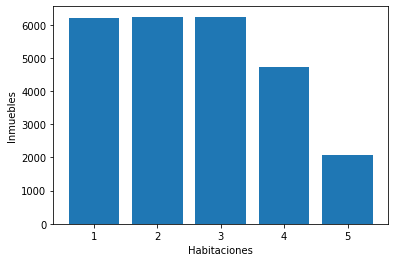

In [ ]:
df_caba = df.loc[df['state_name'] == 'Capital Federal']
filtroRooms = df_caba[df['rooms'].between(1, 5)]
df_columnRooms = filtroRooms.loc[:, 'rooms']
x_values = df_columnRooms.unique()
y_values = pd.value_counts(df_columnRooms.values, sort=False)
plt.bar(x_values, y_values)
plt.xlabel('Habitaciones')
plt.ylabel('Inmuebles')
plt.show()
plt.close('all')

# Ejercicio 3.1.3
## Hacer un grafico de barras horizontal de los 10 barrios con mayor cantidad de publicaciones de deptos. de 2 ambientes en Capital Federal

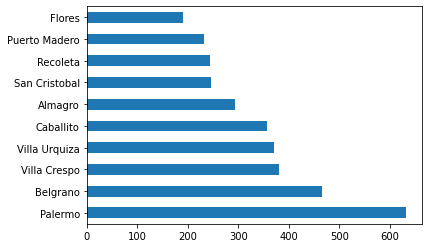

In [ ]:
df_ambientes = df.loc[(df['rooms']==2) & (df['state_name'] == 'Capital Federal')]
df_columBarrios = df_ambientes.loc[:,'place_name']
serie_barrio = pd.Series(df_columBarrios).value_counts().head(10)
serie_barrio.plot.barh()

#Ejercicio 3.2
####Para aquellas propiedades de Capital Federal que tengan informaci´on geogr´afica se pide escribir un programa para hacer un scatterplot de las propiedades que difieran a lo sumo en 0.05 grados en latitud y longitud respecto al centro geogr´afico de la ciudad. Obs.: obtener las coordenadas del centro de la ciudad de modo aproximado con googlemaps).

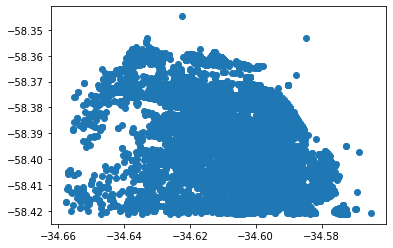

In [ ]:
dfCapitalCoordenadas = df[(df['state_name'] == 'Capital Federal') & (df['lat-lon'].notna()) & (df['lat'].notna()) & (df['lon'].notna())]
# Coordenadas Ciudad de Buenos Aires:	Latitud: -34.6083, Longitud: -58.3712
# Latitud Mínima: -34.6583 ; Latitud Máxima: -34.5583
# Longitud Mínima: -58.4212 ; Longitud Máxima: -58.3212

dfCapitalCoordenadas = dfCapitalCoordenadas.astype({"lat": float, "lon": float})
dfCapitalCoordenadas = dfCapitalCoordenadas[dfCapitalCoordenadas['lat'].between(-34.6583, -34.5583)]
dfCapitalCoordenadas = dfCapitalCoordenadas[dfCapitalCoordenadas['lat'].between(-58.4212, -58.3212)]
plt.scatter(dfCapitalFiltrado['lat'], dfCapitalFiltrado['lon'])

# Ejercicio 3.3
## En el cap. 5 (pag. 96-102) del libro 1 se explican las medidas de tendencia central y de dispersion para describir estadísticamente un conjunto de datos. En este ejercicio la idea es utilizar algunas de esas medidas para realizar especulaciones fundamentadas sobre el conjunto de datos.

Las cinco ciudades con mayor población del país son:
1. Buenos Aires
2. Cordoba
3. Rosario
4. La Plata
5. Mar del Plata

# 3.3.1
Considerando solamente los deptos. de 3 ambientes, escribir un programa que grafique un boxplot de los precios de esos deptos. de las 5 ciudades mencionadas.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


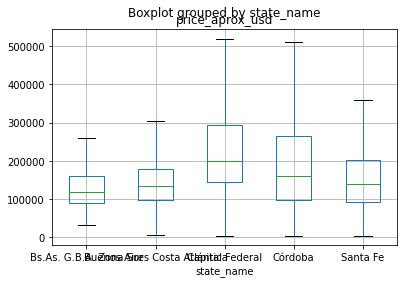

In [137]:
df_tresAmbientes = df.loc[
  (df['rooms']==3) & 
  (df['price_aprox_usd'].notna()) &
  ((df['state_name'] == 'Capital Federal') | 
  (df['state_name'] == 'Córdoba') | 
  (df['place_name'] == 'Rosario') | 
  (df['place_name'] == 'La Plata') |
  (df['place_name'] == 'Mar del Plata'))
]

df_tresAmbientes.boxplot(column=['price_aprox_usd'], by='state_name', showfliers=False)

# Ejercicio 3.3.2
###Basandose en el gráfico anterior, responder a las siguientes preguntas:
1. Cual es la ciudad con mayor costo de vida? Justificar

  - La ciudad con mayor costo de vida es la Ciudad de Buenos Aires ya que tiene una media más alta y disperción entre sus datos. Los departamentos tienen aproximadamente una mediana de 200000 USD aproximadamente y es la más alta comparada a las de las otras ciudades.

2. Cual es la ciudad más equitativa? Justificar

  - La ciudad más equitativa es la ciudad de La Plata, basicamente es la que tiene menor disperción entre los precios de venta de sus departamentos, además de tener la mediana más baja si se compara con las demás ciudades.

3. Proponer algunos argumentos por los cuales podría ser incorrecto deducir las dos respuestas anteriores del conjunto de datos que estamos utilizando

  - Si nos referimos a costo de vida, esta mal la argumentación ya que no solo hay que basarse en el costo de un departamento, sino que incluye más gastos como por ejemplo las expensas, servicios, alimentos, etc. Lo mismo incluye para la ciudad más equitativa.
  - El data set puede llegar a tener más datos para contemplar más realmente estos datos estadísticos, ya que seguramente hay muchos más departamentos para obtener datos ademas de los que estan en este data set.
